### Exercício 8 realizado por Alícia Gouveia e Sofia Rodrigues

Using the dataset in EFIplus_medit.zip:

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pdpbox import pdp

In [8]:
#Load the dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

#Drop NaN values
df = df.dropna()

# Display the column names (header names) of the dataset
print(df.columns)

Index(['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name',
       'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect',
       'Calib_hydrol',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=164)


Create the species richness column

In [9]:
# From previous exercise

# Get the columns for species
species_columns = df.columns[df.columns.get_loc('Abramis brama'):]

# Calculate species richness
df['Species_Richness'] = df[species_columns].sum(axis=1)

# Print just the 'Species_Richness' column
print(df['Species_Richness'])

# Print descriptive statistics for 'Species_Richness' column
print(df['Species_Richness'].describe())

18      6
19      6
28      7
32      8
43      7
       ..
5006    5
5007    7
5008    6
5009    1
5010    6
Name: Species_Richness, Length: 2822, dtype: int64
count    2822.000000
mean        3.418143
std         2.432979
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Species_Richness, dtype: float64


Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation.

In [10]:
# Select continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

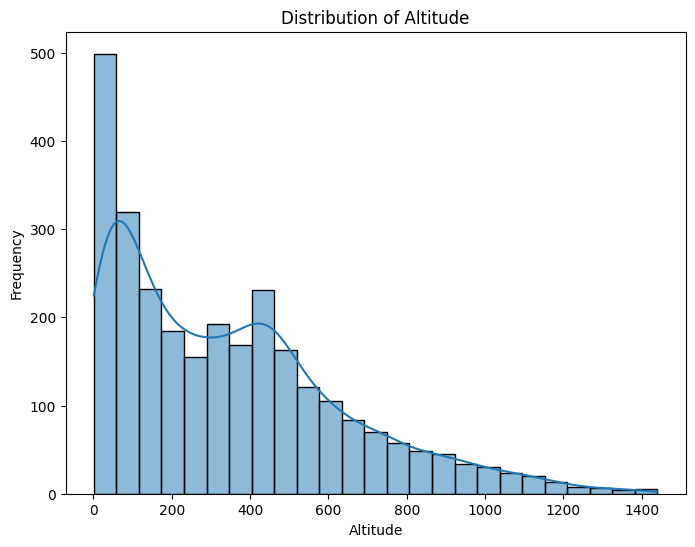

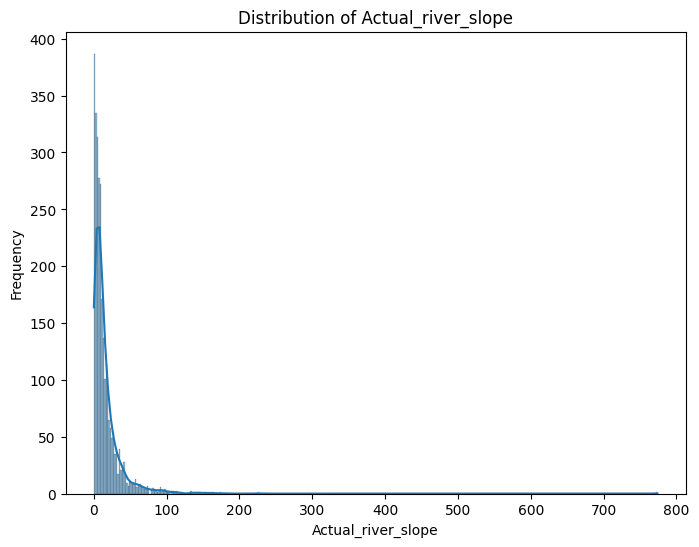

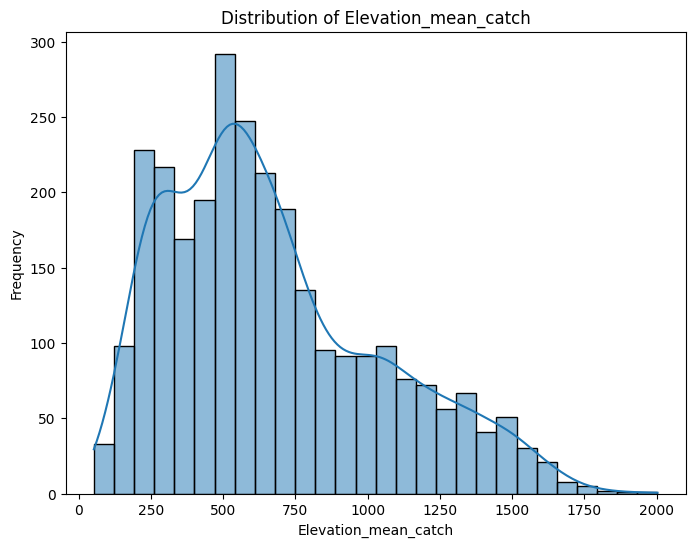

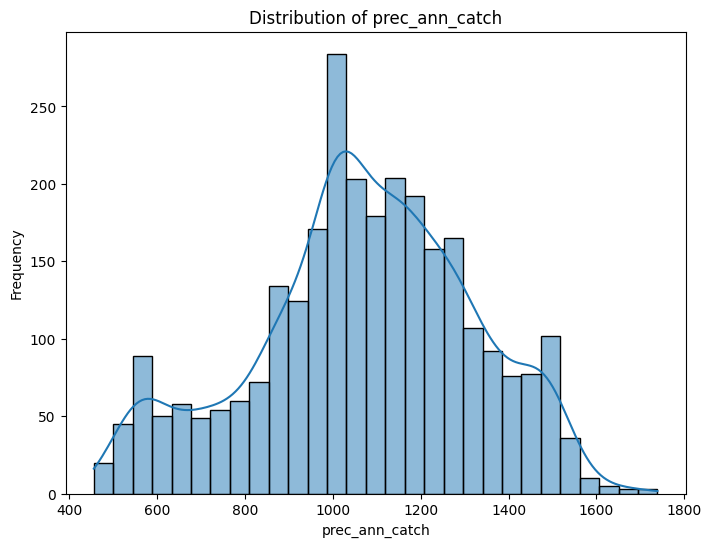

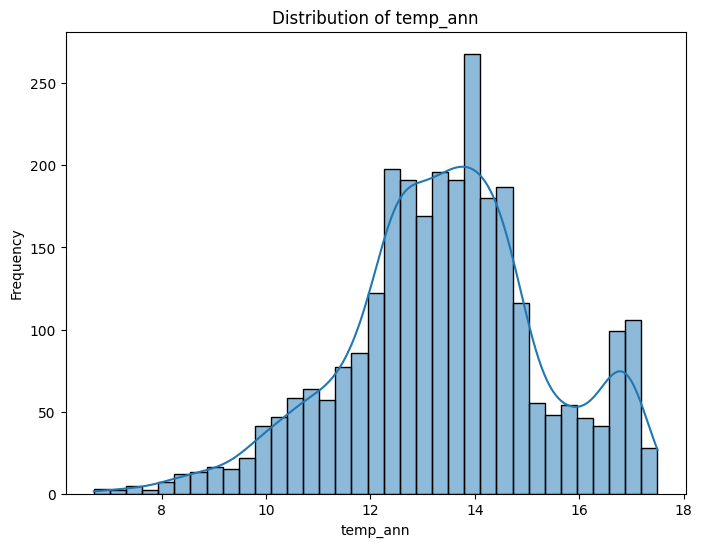

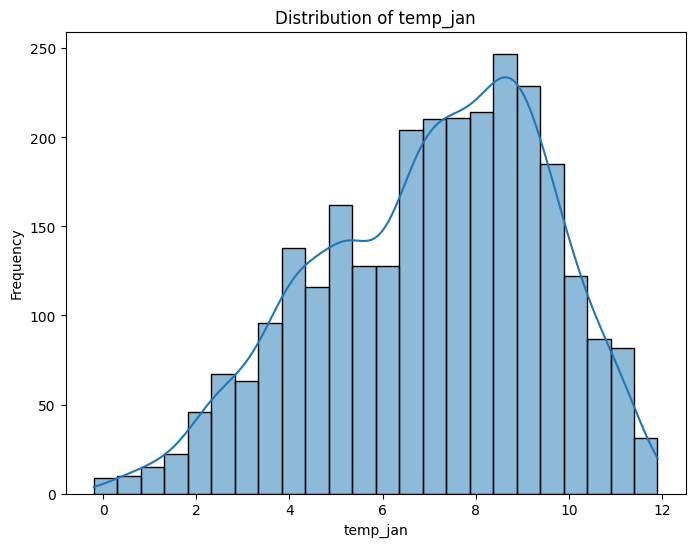

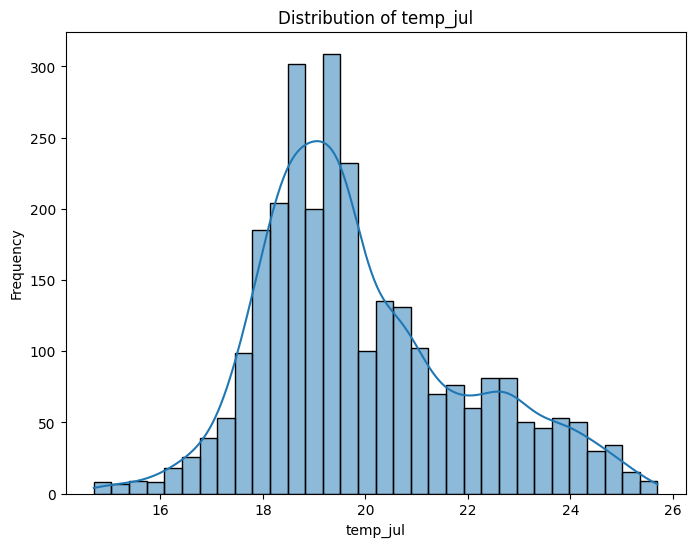

Applied square root transformation to 'Altitude', and stored as 'Altitude_sqrt'.
Applied log transformation to 'Actual_river_slope', and stored as 'Actual_river_slope_log'.
Applied square root transformation to 'Elevation_mean_catch', and stored as 'Elevation_mean_catch_sqrt'.
Applied square root transformation to 'prec_ann_catch', and stored as 'prec_ann_catch_sqrt'.
Applied square root transformation to 'temp_ann', and stored as 'temp_ann_sqrt'.
Applied log transformation to 'temp_jan', and stored as 'temp_jan_log'.
Applied square root transformation to 'temp_jul', and stored as 'temp_jul_sqrt'.
     Site_code   Latitude  Longitude Country Catchment_name  Galiza  \
18  ES_03_0001  41.957268  -2.926857   Spain          Douro       0   
19  ES_03_0002  41.850818  -2.591150   Spain          Douro       0   
28  ES_03_0012  41.498026  -5.528753   Spain          Douro       0   
32  ES_03_0016  41.586853  -3.072064   Spain          Douro       0   
43  ES_03_0029  41.830177  -3.782420   S

In [11]:
# Check the distributions of continuous variables
for var in continuous_vars:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot histogram
    sns.histplot(df[var], kde=True, ax=ax)
    
    # Set labels and title
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    
    # Show the plot
    plt.show()

# Apply transformations if necessary
for var in continuous_vars:
    # Check for negative values before applying certain transformations
    if (df[var] <= 0).any():
        # Log transformation if the variable contains zero or negative values
        transformed_var = var + '_log'
        df[transformed_var] = np.log(df[var] - df[var].min() + 1)  # Adding 1 to handle zero values
        print(f"Applied log transformation to '{var}', and stored as '{transformed_var}'.")
    else:
        # Otherwise, apply square root transformation
        transformed_var = var + '_sqrt'
        df[transformed_var] = np.sqrt(df[var])
        print(f"Applied square root transformation to '{var}', and stored as '{transformed_var}'.")

# Display the transformed variables
print(df.head())


Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul. Compute the regression coefficient estimates, the r-square and the F statistics. You may plot the fitted model.

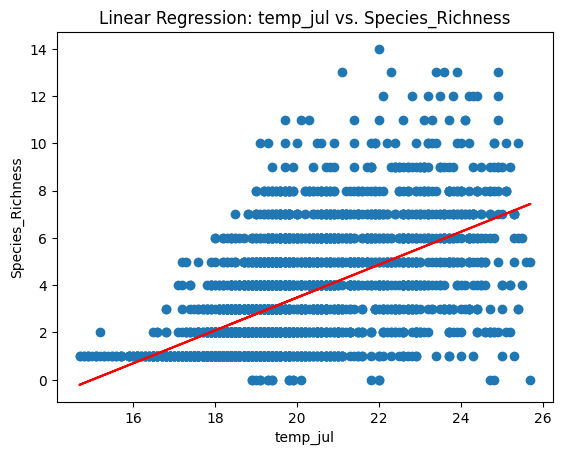

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




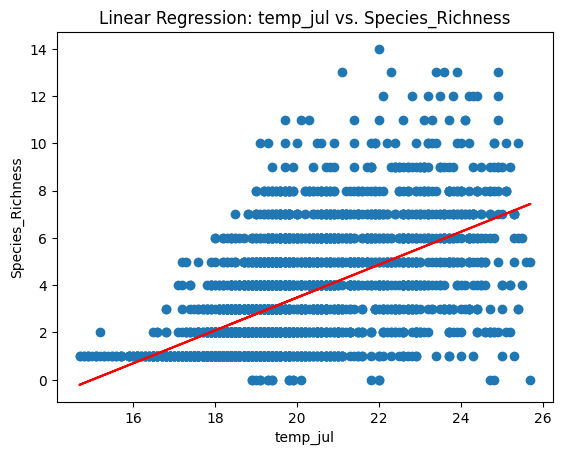

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




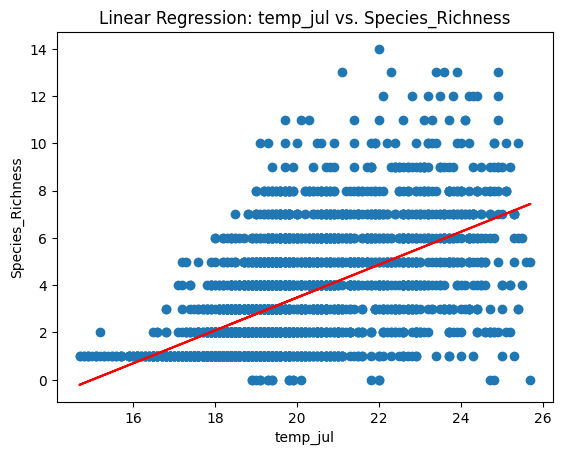

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




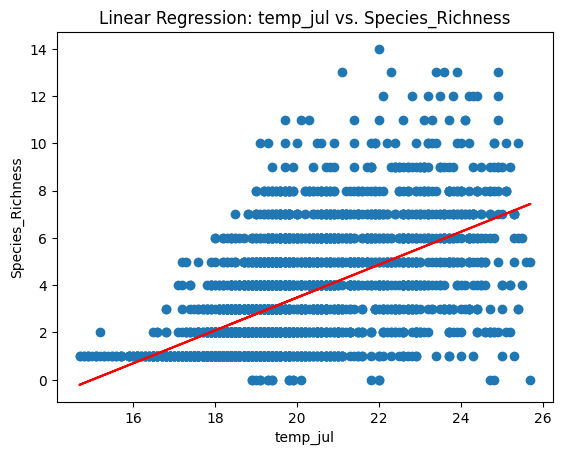

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




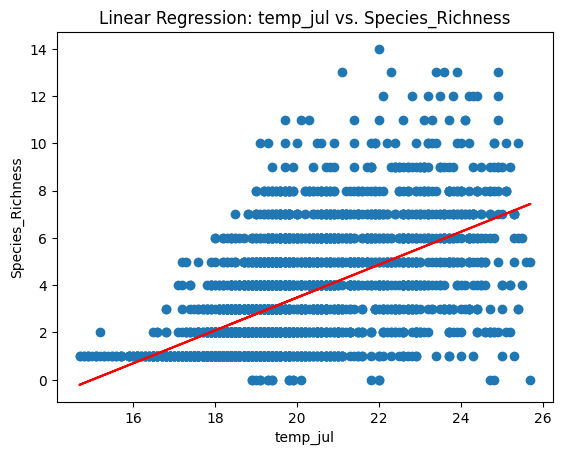

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




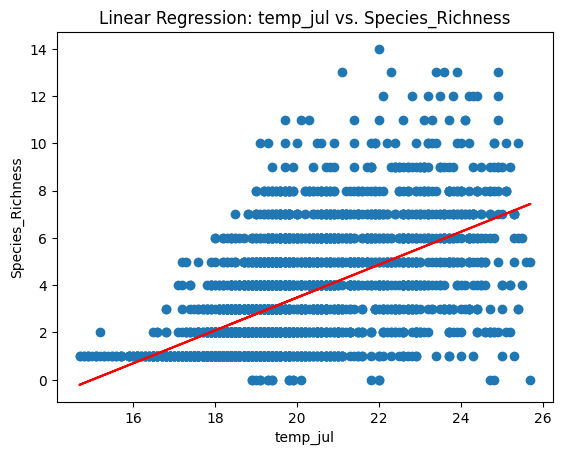

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




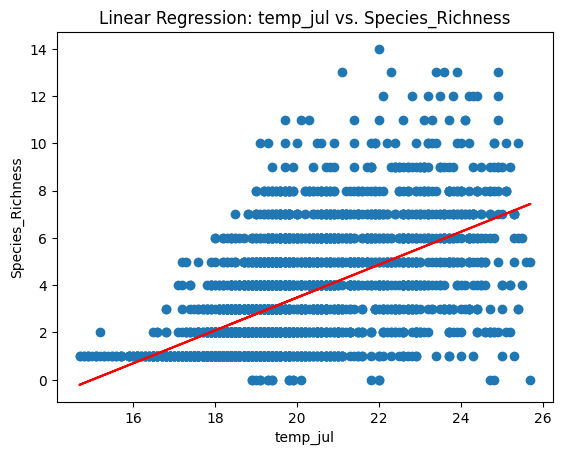

Regression for temp_jul:
Slope: 0.6957113106075015
Intercept: -10.439873916324903
R-value: 0.5776571856480621
P-value: 6.3157766267276424e-251
Standard error: 0.0185128466856442




In [13]:
# Iterate over each continuous variable and run a simple linear regression
for variable in continuous_vars:
    x = df[var]
    y = df['Species_Richness']
   
    # Execute linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    
    # Plot data with fitted line
    plt.scatter(x, y)
    plt.plot(x, intercept + slope * x, color="red")
    plt.xlabel(var)
    plt.ylabel('Species_Richness')
    plt.title(f'Linear Regression: {var} vs. Species_Richness')
    plt.show()
    
    # Print the results
    print(f"Regression for {var}:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-value: {r}")
    print(f"P-value: {p}")
    print(f"Standard error: {std_err}")
    print("\n")

Now try to run a multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and the new coefficients.

In [14]:
# Define the independent variables (X) and add a constant
X=df[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

# Define the dependent variable (y)
y=df['Species_Richness']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the results summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:       Species_Richness   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1473.
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        10:43:26   Log-Likelihood:                         -5878.2
No. Observations:                2822   AIC:                                  1.177e+04
Df Residuals:                    2815   BIC:                                  1.181e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Plot the partial dependence plots to compare responses with the previous single effects.

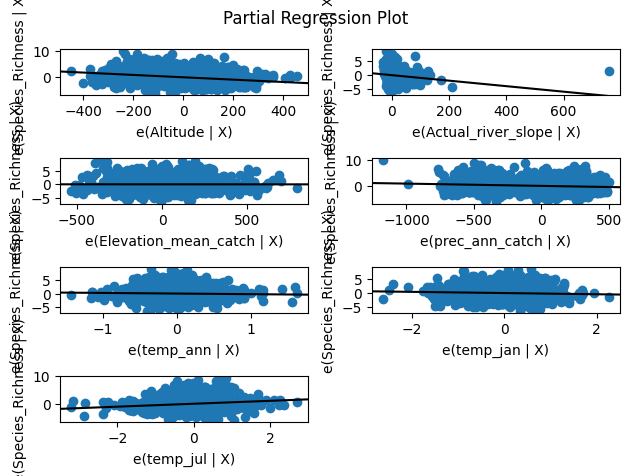

In [15]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)


Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
dependent_variable = ['Species_Richness']

# Drop rows with missing values for all predictor variables
df_clean = df.dropna(subset=continuous_vars)

# Ensure data types are consistent
df_clean[continuous_vars] = df_clean[continuous_vars].astype(float)

# Add constant to the independent variables (predictor variables)
X = sm.add_constant(df_clean[continuous_vars])

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
               Variable         VIF
0                 const  449.678015
1              Altitude    7.288657
2    Actual_river_slope    1.121153
3  Elevation_mean_catch    5.898406
4        prec_ann_catch    1.454947
5              temp_ann   56.766712
6              temp_jan   27.067954
7              temp_jul   14.150934
